# Prediction Whether the Employee will left the company or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/hp/Desktop/MentorBuddy/Datasets/Company Attrition Data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Sales_Occured          14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## Converting Catagorical data into Numerical

In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sales_Occured'] =label.fit_transform(df['Sales_Occured'])
df['salary'] =label.fit_transform(df['salary'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [6]:
X=df.iloc[:,[0,1,2,3,4,5,7,8,9]]
X=pd.DataFrame(X)
y=df.iloc[:,6]
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


## Spliting data into training and testing 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [10]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Sales_Occured,salary
837,0.09,0.93,6,308,4,0,0,1,1
10843,0.95,0.62,4,150,2,0,0,4,1
6220,0.69,0.79,3,207,3,0,0,9,2
152,0.37,0.52,2,143,3,0,0,5,1
7675,0.56,0.99,3,209,2,0,0,9,1
...,...,...,...,...,...,...,...,...,...
14864,0.37,0.51,2,132,3,0,0,9,2
1733,0.42,0.52,2,160,3,0,0,8,1
1760,0.37,0.55,2,140,3,0,0,9,1
485,0.32,0.95,5,172,2,0,0,7,1


In [11]:
y_train

837      1
10843    0
6220     0
152      1
7675     0
        ..
14864    1
1733     1
1760     1
485      1
2105     0
Name: left, Length: 10499, dtype: int64

## RandomForestClassifier

In [13]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [14]:
RF=RandomForestClassifier(n_estimators=31,random_state=42)

In [15]:
clf=RF.fit(X_train,y_train)

In [16]:
clf.estimators_ 

[DecisionTreeClassifier(max_features='auto', random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_features='auto', random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_features='auto', random_state=1914837113),
 DecisionTreeClassifier(max_features='auto', random_state=669991378),
 DecisionTreeClassifier(max_features='auto', random_state=429389014),
 DecisionTreeClassifier(max_features='auto', random_state=249467210),
 DecisionTreeClassifier(max_features='auto', random_state=1972458954),
 DecisionTreeC

## Visualization

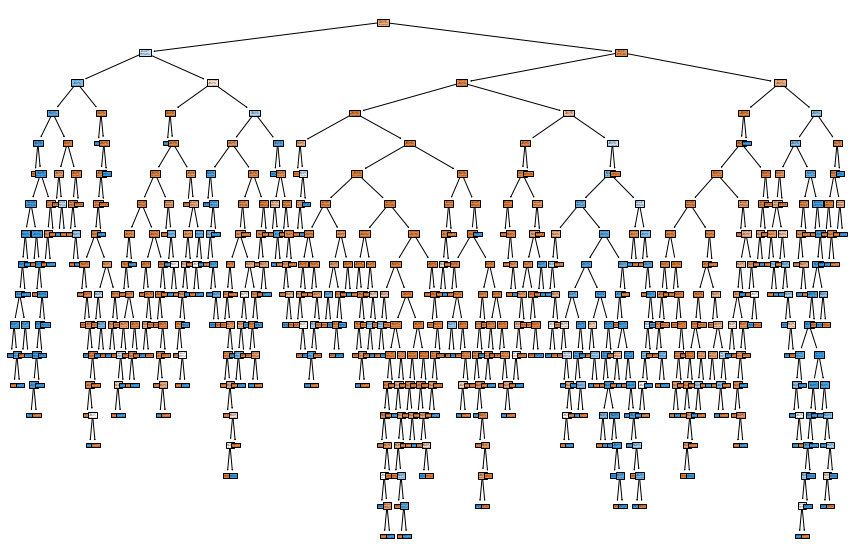

In [17]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[0],filled=True);

In [19]:
pred=RF.predict(X_test)
pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

## Predicting Accuracy

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
confusion_matrix(y_test,pred)
accuracy_score(y_test,pred)*100

99.0

## Reason For Leaving The Company

In [24]:
Reason1=pd.DataFrame()
i=0
WithorNotWorkAccident=0
while i<len(y):
        if(df.iloc[[i],0].values> 0.5 and df.iloc[[i],1].values > 0.5 and df.iloc[[i],4].values> 4):
            a=[df.iloc[i,[7,9]].values]
            df1=pd.DataFrame(a)
            Reason1=Reason1.append(df1)
            i=i+1
            WithorNotWorkAccident=WithorNotWorkAccident+1
        else:
            i=i+1

Reason1=Reason1.reset_index()
Reason1=Reason1.drop('index',1)

In [25]:
Reason2=pd.DataFrame()
i=0
WithWorkAccident=0
while i<len(y):
        if(df.iloc[[i],0].values> 0.5 and df.iloc[[i],1].values > 0.5 and df.iloc[[i],4].values> 4 and df.iloc[[i],5].values==1):
            a=[df.iloc[i,[7,9]].values]
            df1=pd.DataFrame(a)
            Reason2=Reason2.append(df1)
            i=i+1
            WithWorkAccident=WithWorkAccident+1
        else:
            i=i+1

Reason2=Reason2.reset_index()
Reason2=Reason2.drop('index',1)

Reason2WithoutAcc=pd.DataFrame()
i=0
WithoutWorkAccident=0
while i<len(y):
        if(df.iloc[[i],0].values> 0.5 and df.iloc[[i],1].values > 0.5 and df.iloc[[i],4].values> 4 and df.iloc[[i],5].values==0):
            a=[df.iloc[i,[7,9]].values]
            df1=pd.DataFrame(a)
            Reason2WithoutAcc=Reason2WithoutAcc.append(df1)
            i=i+1
            WithoutWorkAccident=WithoutWorkAccident+1
        else:
            i=i+1

Reason2WithoutAcc=Reason2WithoutAcc.reset_index()
Reason2WithoutAcc=Reason2WithoutAcc.drop('index',1)

In [26]:
Reason3=pd.DataFrame()
i=0
WithHigherProjects=0
while i<len(y):
        if(df.iloc[[i],0].values> 0.5 and df.iloc[[i],1].values > 0.5 and df.iloc[[i],4].values> 4 and df.iloc[[i],2].values>3):
            a=[df.iloc[i,[7,8,9]].values]
            df1=pd.DataFrame(a)
            Reason3=Reason3.append(df1)
            i=i+1
            WithHigherProjects=WithHigherProjects+1
        else:
            i=i+1

Reason3=Reason3.reset_index()
Reason3=Reason3.drop('index',1)


In [27]:
Reason4=pd.DataFrame()
i=0
WithPromotion=0
while i<len(y):
        if(df.iloc[[i],0].values> 0.5 and df.iloc[[i],1].values > 0.5 and df.iloc[[i],4].values> 4 and df.iloc[[i],2].values>3 and df.iloc[[i],7].values==1):
            a=[df.iloc[i,[9]].values]
            df1=pd.DataFrame(a)
            Reason4=Reason4.append(df1)
            i=i+1
            WithPromotion=WithPromotion+1
        else:
            i=i+1

Reason4=Reason4.reset_index()
Reason4=Reason4.drop('index',1)

In [32]:
Reason5=pd.DataFrame()
i=0
WithHigherTime=0
while i<len(y):
        if(df.iloc[[i],0].values> 0.5 and df.iloc[[i],1].values > 0.5 and df.iloc[[i],4].values> 4 and df.iloc[[i],2].values>3 and df.iloc[[i],3].values>200):
            a=[df.iloc[i,[9]].values]
            df1=pd.DataFrame(a)
            Reason5=Reason5.append(df1)
            i=i+1
            WithHigherTime=WithHigherTime+1
        else:
            i=i+1

Reason5=Reason5.reset_index()
Reason5=Reason5.drop('index',1)

In [38]:
Reason6=pd.DataFrame()
i=0
WithLowerSalary=0
while i<len(y):
        if(df.iloc[[i],0].values> 0.5 and df.iloc[[i],1].values > 0.5 and df.iloc[[i],4].values> 4 and df.iloc[[i],2].values>3 and df.iloc[[i],9].values==0):
            a=[df.iloc[i,[7]].values]
            df1=pd.DataFrame(a)
            Reason6=Reason6.append(df1)
            i=i+1
            WithLowerSalary=WithLowerSalary+1
        else:
            i=i+1

Reason6=Reason6.reset_index()
Reason6=Reason6.drop('index',1)

## Comparisson

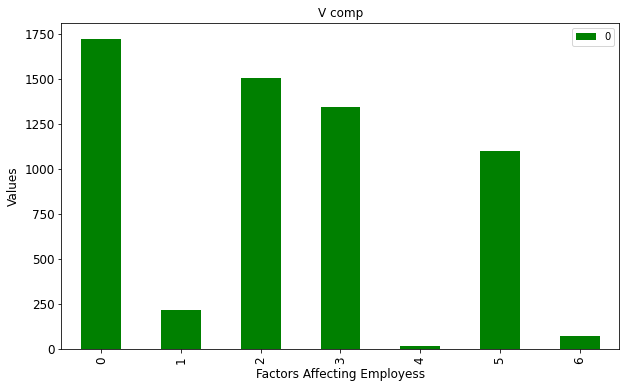

In [41]:
b=[WithorNotWorkAccident,WithWorkAccident,WithoutWorkAccident,WithHigherProjects,WithPromotion,WithHigherTime,WithLowerSalary]
Visual=pd.DataFrame(b)

ax = Visual[0].plot(kind='bar', title ="V comp",figsize=(10,6), color="green", legend=True, fontsize=12)
ax.set_xlabel("Factors Affecting Employess", fontsize=12)
ax.set_ylabel("Values", fontsize=12)
plt.show()